In [15]:
import sys
import os
sys.path.insert(0, os.getcwd()+'/src/')
sys.path.insert(0, '/home/mcarenso/code/stage-2023-multiscale-extremes/scripts/src/')
from myImports import *
%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
stringSST = "300" ##295, 300 or 305
n_days = 10

file_seg='/bdd/MT_WORKSPACE/MCS/RCE/SAM/TOOCAN/TOOCAN_v2023_05/Dspread0K/irtb/TOOCAN_2.07_SAM_large300_2D_irtb.nc'
file_tracking='/bdd/MT_WORKSPACE/MCS/RCE/SAM/TOOCAN/TOOCAN_v2023_05/Dspread0K/irtb/FileTracking/TOOCAN-SAM_large300_2D_irtb.dat.gz'
sam_file = "/bdd/MT_WORKSPACE/MCS/RCE/SAM/INPUTS/v2023_05/SAM_RCE_large300_2D_pr.nc"

## Open Precip data under ds

In [17]:

da = xr.open_dataarray(sam_file)
## isel n_days
da = da.isel(time=slice(0, n_days*48))

In [18]:
filename = 'dist_SAM_Native_Prec_sizemax_1e7.pkl' # used for import or saving the object
path = '/homedata/mcarenso/distrib_nd5/test10day/'  # my desired directory path

# Check if the file exists
if os.path.isfile(os.path.join(path, filename)):
    # File exists, load the object
    with open(os.path.join(path, filename), 'rb') as file:
        dist_SAM_Prec = pickle.load(file)
else:
    # File doesn't exist, create the object
    dist_SAM_Prec = cs.Distribution(name="SAM Precipitation", bintype = "invlogQ", nd = 5, fill_last_decade=True)
    dist_SAM_Prec.computeDistribution(sample = da.to_numpy().flatten())
    dist_SAM_Prec.storeSamplePoints(sample = da.to_numpy().flatten(), sizemax = int(1e7))

    # Save the object as a file
    with open(os.path.join(path, filename), 'wb') as file:
        pickle.dump(dist_SAM_Prec, file)

/home/mcarenso/.conda/envs/PyLMD/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


## Open MCS_list and extract the 6hours 10hours MCS and pot some of their data distrib

In [19]:
## Import MCS list and prepare label list

from load_TOOCAN_DYAMOND_modif_BenAndMax import load_TOOCAN_DYAMOND
MCS = load_TOOCAN_DYAMOND(file_tracking)
MCS_labels = [MCS[i].label for i in range(len(MCS))]

## function to retrieve the indexes in MCS by MCS labels, could be put in myFuncs but need label_list from the tracking file

def idx_by_label(labels, label_list = MCS_labels):
    idxs = [label_list.index(label) for label in labels]
    return idxs

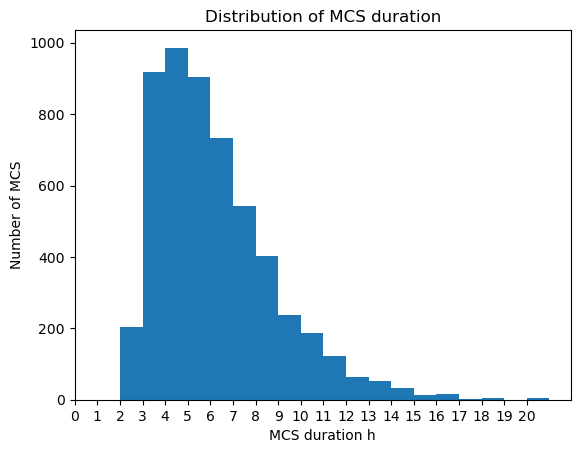

In [20]:
%matplotlib inline
MCS_durations = [MCS[i].duration for i in range(len(MCS))]
# plot the distribution of MCS duration
plt.hist([MCS[i].duration for i in range(len(MCS))], bins = (max(MCS_durations)- min(MCS_durations))//2)

#xticks are half hourly make them hourly
tick_locs = np.arange(0, max(MCS_durations), 2)
tick_labels = np.arange(0, max(MCS_durations),2)//2
plt.xticks(tick_locs, tick_labels)

plt.xlabel("MCS duration h")
plt.ylabel("Number of MCS")
plt.title("Distribution of MCS duration")
plt.show()

In [21]:
MCS_2h_to_10h = [MCS[i] for i in range(len(MCS)) if MCS[i].duration in np.arange(4, 21, 1).astype(int).tolist()]
MCS_2h_to_10h_labels = [MCS_2h_to_10h[i].label for i in range(len(MCS_2h_to_10h))]

## Create masks (bools or labels)

In [22]:
## label_mask contains the label of the MCS over the map
label_mask = xr.open_dataarray(file_seg).isel(time=slice(48*n_days))

label_2h_to_10h_mask = label_mask.where(label_mask.isin(MCS_2h_to_10h_labels))

mask_2h_to_10h = ~label_2h_to_10h_mask.where(label_2h_to_10h_mask.isnull(), False).isnull()
# da contains the native precipitation values over the map filtered where there is an MCS
# Prec = ds["Prec"].where(mask_6h)

# Compute Analysis of Normalzied Age of MCS over XPrecip bins for MCS around 6h lifetime

In [23]:
filename = "AgeAnalysis.pkl"
path_data = "/homedata/mcarenso/Stage2023/SAM/300K/test10day/"
## if file exists, load it
if os.path.isfile(path_data + filename):
    with open(os.path.join(path_data, filename), 'rb') as file:
        output = pickle.load(file)
        
else : 
    ## compute the age analysis
    output = dist_SAM_Prec.computeAgeAnalysisOverBins(sample = da.values, MCS_list = MCS_2h_to_10h, label = label_2h_to_10h_mask.compute().values, sizemax = int(1e5))
    
    ## save the output
    with open(os.path.join(path_data, filename), 'wb') as file:  
        pickle.dump(output, file)   

init phase :  0.9059407711029053
loop  11  :  2.2242138385772705
loop  12  :  29.720590114593506
loop  13  :  34.33050346374512
loop  14  :  33.460739612579346
loop  15  :  33.41493344306946
loop  16  :  33.06410503387451
loop  17  :  30.28245997428894
loop  18  :  27.83939242362976
loop  19  :  25.661226511001587
loop  20  :  22.673887491226196
loop  21  :  20.138288021087646
loop  22  :  17.28875422477722
loop  23  :  14.797006607055664
loop  24  :  12.354963541030884
loop  25  :  10.058552503585815
loop  26  :  8.358005046844482
loop  27  :  6.555928707122803
loop  28  :  5.184661865234375
loop  29  :  4.190737962722778
loop  30  :  3.359229564666748
loop  31  :  2.6467671394348145
loop  32  :  2.0882952213287354
loop  33  :  1.6272180080413818
loop  34  :  1.2740650177001953
loop  35  :  1.014652967453003
loop  36  :  0.7696073055267334
loop  37  :  0.5927038192749023
loop  38  :  0.4503364562988281
loop  39  :  0.35713720321655273
loop  40  :  0.2799198627471924
loop  41  :  0.231

## Import data loaded by the python job

In [25]:
Ages_over_bins, Ages_of_Xprecip, Xprecip_over_ages, Xprecip_counts, Ages_per_duration, Ages_of_MaxPrecip, MaxPrecip_over_ages, MaxPrecip_MCS_counts = output

## Plot Ages over bins and save them

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


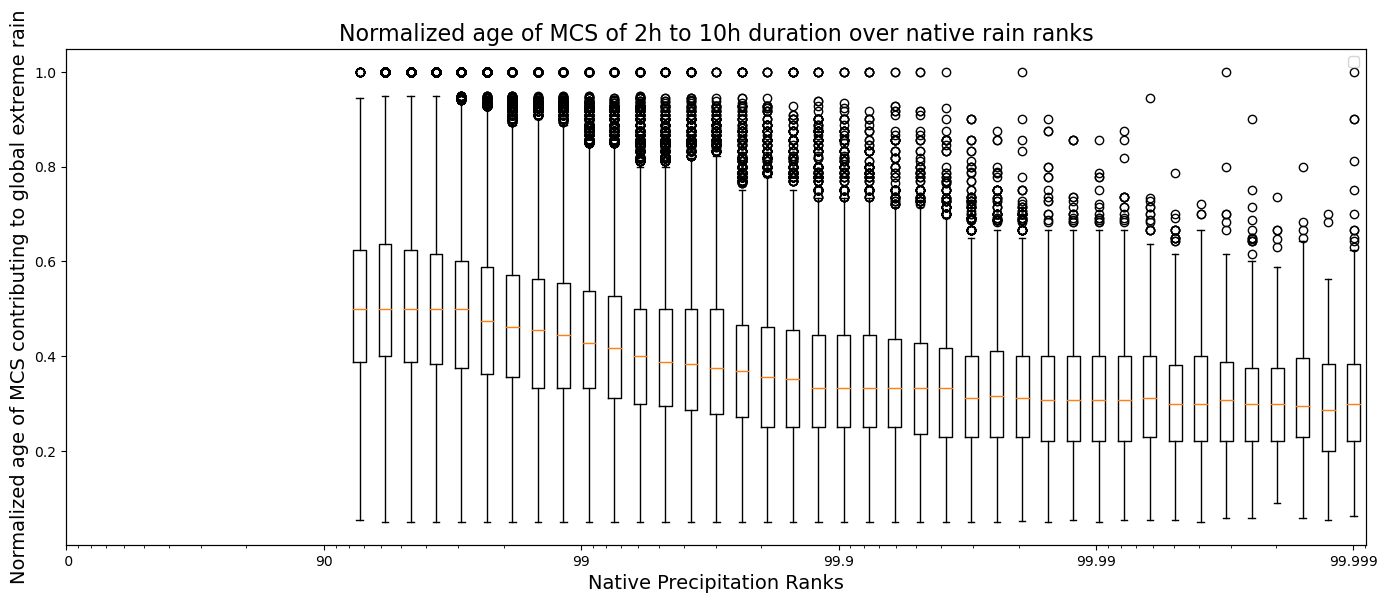

In [26]:
%matplotlib inline
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize= (14, 6))
x=dist_SAM_Prec.ranks

setXaxisIL(ax, x)
ax_show = ax.twiny()
ax_show.boxplot(Ages_over_bins)
ax_show.set_xticks([])

ax.set_xlabel("Native Precipitation Ranks", fontsize = 14)

ax.set_ylabel("Normalized age of MCS contributing to global extreme rain", fontsize = 14)
plt.legend()
plt.title("Normalized age of MCS of 2h to 10h duration over native rain ranks", fontsize = 16)
plt.tight_layout()
#plt.savefig("Ages_over_bins.png", dpi = 300)
plt.show()

## Plot Xprecip over ages for 2h-10h MCS

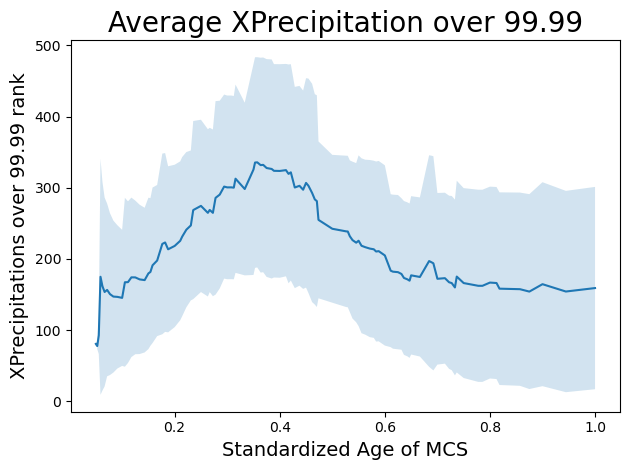

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate moving average
window_width = 20  # Change this value to adjust the width of the moving average
rolling_average = pd.Series(Xprecip_over_ages).rolling(window=window_width, min_periods=1).mean()
rolling_std = pd.Series(Xprecip_over_ages).rolling(window=window_width, min_periods=1).std()

# Plot the moving average
plt.plot(Ages_of_Xprecip, rolling_average)
plt.fill_between(Ages_of_Xprecip, rolling_average - rolling_std, rolling_average + rolling_std, alpha=0.2)
plt.xlabel('Standardized Age of MCS', fontsize=14)
plt.ylabel('XPrecipitations over 99.99 rank', fontsize=14)
plt.title('Average XPrecipitation over 99.99', fontsize=20)
plt.tight_layout()
#plt.savefig(output_MESONH_path + "Xprecip_over_ages_width20.png", dpi = 300)
plt.show()

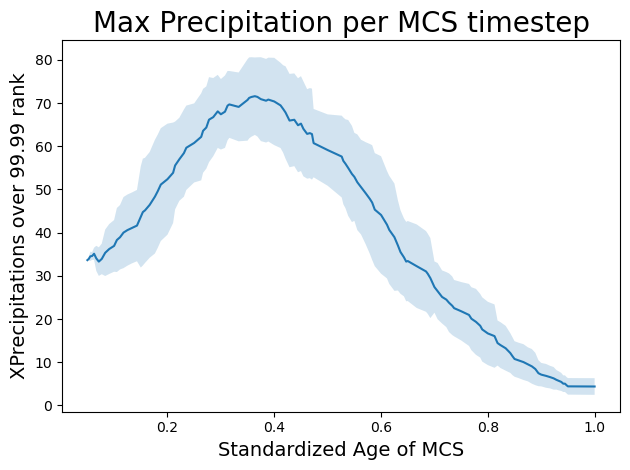

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate moving average
window_width = 20  # Change this value to adjust the width of the moving average
rolling_average = pd.Series(MaxPrecip_over_ages).rolling(window=window_width, min_periods=1).mean()
rolling_std = pd.Series(MaxPrecip_over_ages).rolling(window=window_width, min_periods=1).std()

# Plot the moving average
plt.plot(Ages_of_MaxPrecip, rolling_average)
plt.fill_between(Ages_of_MaxPrecip, rolling_average - rolling_std, rolling_average + rolling_std, alpha=0.2)
plt.xlabel('Standardized Age of MCS', fontsize=14)
plt.ylabel('XPrecipitations over 99.99 rank', fontsize=14)
plt.title('Max Precipitation per MCS timestep', fontsize=20)
plt.tight_layout()
#plt.savefig(output_MESONH_path + "Xprecip_over_ages_width20.png", dpi = 300)
plt.show()

## Plot #MCS over ages for 2h-10h MCS

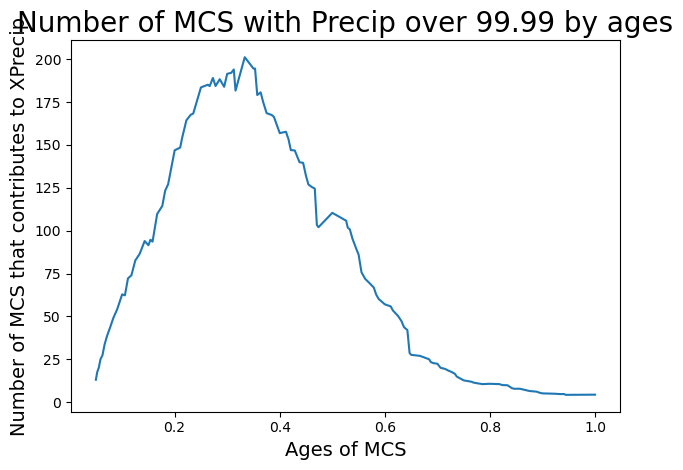

In [ ]:

# Calculate moving average
window_width = 20  # Change this value to adjust the width of the moving average
rolling_average = pd.Series(Xprecip_counts).rolling(window=window_width, min_periods=1).mean()

plt.plot(Ages_of_Xprecip, rolling_average)
plt.xlabel('Ages of MCS', fontsize = 14)
plt.ylabel('Number of MCS that contributes to XPrecip', fontsize = 14)
plt.title('Number of MCS with Precip over 99.99 by ages', fontsize = 20)
plt.tight_layout()
#plt.savefig(output_path + "Xprecip_counts_over_ages_width20.png", dpi = 300)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


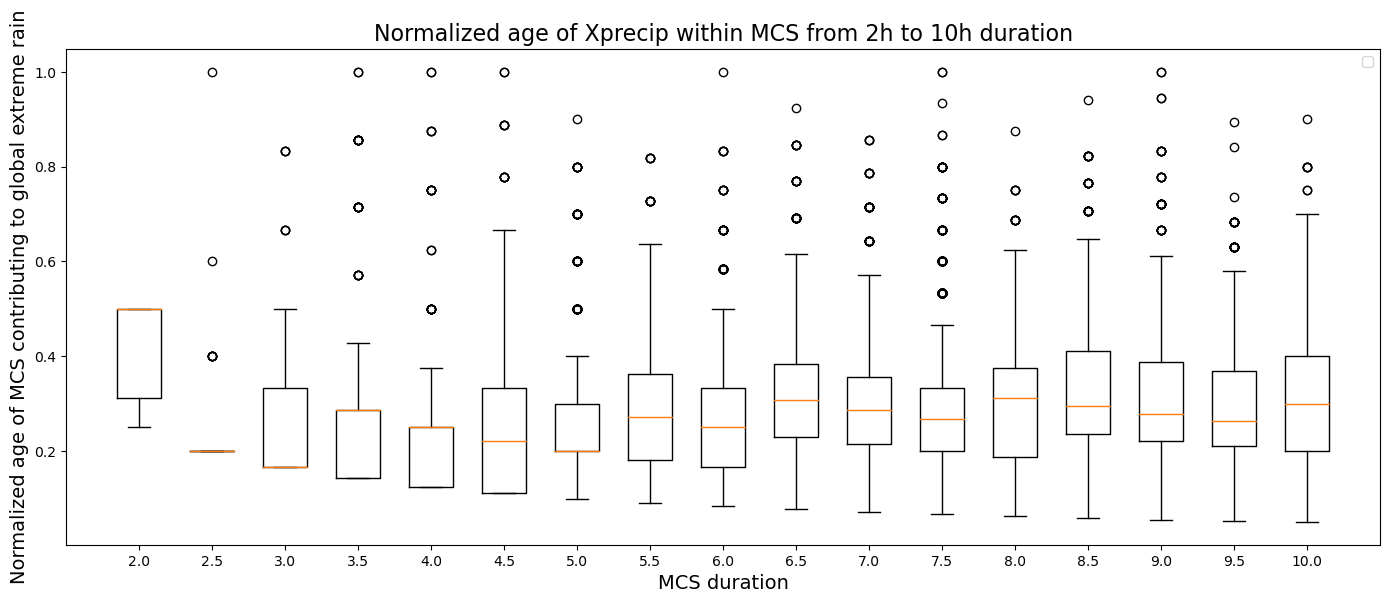

In [ ]:
%matplotlib inline

MCS_duration_2h_to_10h = np.arange(2, 10.5, 1/2)

fig, ax = plt.subplots(nrows = 1, ncols=1, figsize= (14, 6))
ax.boxplot(Ages_per_duration, positions = MCS_duration_2h_to_10h, widths = 0.3)


ax.set_xlabel("MCS duration", fontsize = 14)
ax.set_ylabel("Normalized age of MCS contributing to global extreme rain", fontsize = 14)
plt.legend()
plt.title("Normalized age of Xprecip within MCS from 2h to 10h duration", fontsize = 16)
plt.tight_layout()
#plt.savefig(output_path + "Ages_per_duration.png", dpi = 300)
plt.show()


## New ensemble : Maximal precipitation per MCS


In [41]:
MCS_list = MCS_2h_to_10h
label_2h_to_10h_mask.shape


(480, 128, 2048)

In [45]:
from myFuncs import Age

max_precip = []
ages_max_precip = []

for mcs in MCS_2h_to_10h:
    precip = da.values[np.where(label_2h_to_10h_mask == mcs.label)]
    maxP = np.max(precip if len(precip)!=0 else None)
    if maxP is not None:
        time,y,x = np.argwhere(da.values == maxP)[0]
        max_precip.append(maxP)
        age = Age(mcs.label, time, mcs)
        ages_max_precip.append(age)

## Check nan over MCS (I'm insecure, am I not)

In [ ]:
from myFuncs import count_rel_nan

path_data = '/homedata/mcarenso/data/'  # my desired directory path
filename = 'perc_MCS_over_rain_'+stringSST+'.pkl'

# check if perc_MCS_over_rain is already computed and saved in homedata 
if os.path.isfile(os.path.join(path_data, filename)):
    # File exists, load the object
    with open(os.path.join(path_data, filename), 'rb') as file:
        perc_MCS_over_rain = pickle.load(file)

check that the curve bounds match
x bounds: 0.0 99.99900000000001
y bounds: 0.0 125.25911251746592



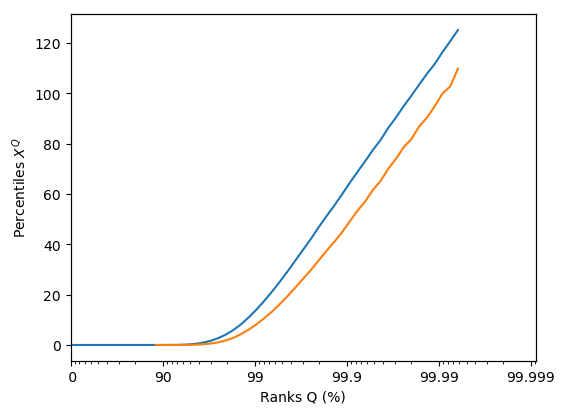

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(ncols=1,figsize=(6,4.5))

ranks = dist_SAM_Prec.ranks
perc = dist_SAM_Prec.percentiles

#--- on IL x axis
ax_show = ax.twiny()

#- set frame
setXaxisIL(ax,ranks)

#- show data
showData(ax_show,ranks,perc, rankmin=0, rankmax = 99.9999)
showData(ax_show, ranks, perc*perc_MCS_over_rain, rankmin=0, rankmax = 99.9999)

#- labels
ax.set_xlabel('Ranks Q (%)')
ax.set_ylabel('Percentiles $X^Q$')

print('check that the curve bounds match')
print('x bounds:',ranks[0],ranks[-1])
print('y bounds:',perc[0],perc[-1])
print()

In [ ]:
### check the distribution of the native precipitations for SAM ICON and MESONH 
SAM_distrib_path = "/homedata/mcarenso/Stage2023/SAM/300K/Distribution_Precip_5decades.pkl"
ICON_distrib_path = "/homedata/mcarenso/Stage2023/ICON/300K/Distribution_Precip_5decades.pkl"
MESONH_distrib_path = "/homedata/mcarenso/Stage2023/MESONH/300K/Distribution_Precip_5decades.pkl"

In [ ]:
## for each path check if file exists and load it into a variable with coherent name 
if os.path.isfile(SAM_distrib_path):
    # File exists, load the object
    with open(SAM_distrib_path, 'rb') as file:
        SAM_distrib = pickle.load(file)
else:    
    print('SAM_distrib_path does not exist')

if os.path.isfile(ICON_distrib_path):
    # File exists, load the object
    with open(ICON_distrib_path, 'rb') as file:
        ICON_distrib = pickle.load(file)
else:
    print('ICON_distrib_path does not exist')
    
if os.path.isfile(MESONH_distrib_path):
    # File exists, load the object
    with open(MESONH_distrib_path, 'rb') as file:
        MESONH_distrib = pickle.load(file)
else:
    print('MESONH_distrib_path does not exist')
    

In [ ]:
file_seg='/bdd/MT_WORKSPACE/MCS/RCE/SAM/TOOCAN/TOOCAN_v2023_05/Dspread0K/irtb/TOOCAN_2.07_SAM_large300_2D_irtb.nc'
file_tracking='/bdd/MT_WORKSPACE/MCS/RCE/SAM/TOOCAN/TOOCAN_v2023_05/Dspread0K/irtb/FileTracking/TOOCAN-SAM_large300_2D_irtb.dat.gz'
sim_path = "/bdd/MT_WORKSPACE/MCS/RCE/SAM/INPUTS/v2023_05/SAM_RCE_large300_2D_pr.nc"
output_path = "/homedata/mcarenso/Stage2023/SAM/300K/"

In [ ]:
SAM_Prec= xr.open_dataarray(sim_path).values.flatten()

In [ ]:
dist_SAM_Prec = pickle.load(open(output_path+'Distribution_Precip_5decades.pkl', 'rb'))

In [ ]:
np.min(SAM_Prec[SAM_Prec>0])

0.0011692168